# Mise en place du notebook

## Importation des modules

In [1]:
# Importation des module
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Ignorer les avertissements spécifiques de la bibliothèque XGBoost
import warnings
warnings.filterwarnings(action="ignore", module="xgboost")
import xgboost as xgb_

# Importation des éléments de "utilitaire.py"
from utilitaire import (
    SPECIES_AMPLICONS_FILE,
    RANDOMS_AMPLICONS_FILE,
    TEST_SET_FILE,
    DATA_SIZE,
    RANDOM_STATE,
    encode_sp,
    plot_classReport,
    plot_data,
)

## Variables globales

In [2]:
###### Datasets ######

SPECIES_AMPLICONS: pd.DataFrame = pd.read_csv(filepath_or_buffer=SPECIES_AMPLICONS_FILE)
RANDOMS_AMPLICONS: pd.DataFrame = pd.read_csv(filepath_or_buffer=RANDOMS_AMPLICONS_FILE)
TEST_SET: pd.DataFrame = pd.read_csv(filepath_or_buffer=TEST_SET_FILE)

###### Datasets ######

## Fonctions

In [3]:
def print_perfClassifier(classifier: object) -> None:

    """ Affiche la performance d'un classifier. """
    
    # Initialiser les variables globales
    global x_train, x_test, y_train, y_test

    # Plotter les résultats d'entraînement
    plot_classReport(classifier=classifier, X=x_train, y=y_train)

    # Plotter les résultat de prédictions sur le test
    plot_classReport(classifier=classifier, X=x_test, y=y_test)

In [4]:
def test_classifier(classifier: object) -> object:

    """ Test la performance d'un classifier. """

    # Initialiser les variables globales
    global x_train, y_train
    
    # Entrainer le classifer
    clf = classifier.fit(X=x_train, y=y_train)

    # Afficher sa performance
    print_perfClassifier(classifier=clf)

    # Retourner le classifer
    return clf

# Exploration des données

## Splitting des données

In [5]:
# Créer le jeu d'entraînement, avec les séquences simulées
train = pd.concat(objs=[SPECIES_AMPLICONS, RANDOMS_AMPLICONS], axis=0)

# Séparer les features des labels
features, labels = train.iloc[:,:-1], train.iloc[:, -1].apply(encode_sp)

# Séparer les features et les labels du jeu d'entraînement
x_train, _, y_train, __ = train_test_split(features, labels, train_size=DATA_SIZE, random_state=RANDOM_STATE, stratify=labels)
display(x_train)

# Séparer les features et les labels du jeu de test
x_test, y_test = TEST_SET.iloc[:, :-1], TEST_SET.iloc[:, -1].apply(encode_sp)
display(x_test)

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
29736,4,3,4,4,2,1,1,2,2,3,...,0,0,0,0,0,0,0,0,0,0
53096,4,3,4,4,2,1,1,2,2,3,...,3,4,3,1,3,1,3,4,0,0
61904,4,3,4,4,2,1,1,2,2,3,...,4,3,4,3,1,3,1,3,4,0
42080,4,3,4,4,2,1,1,2,2,3,...,3,4,0,0,0,0,0,0,0,0
17386,4,3,4,4,2,1,1,2,2,3,...,1,3,1,3,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33615,4,3,4,4,2,1,1,2,2,3,...,4,3,1,3,1,3,4,0,0,0
45222,4,3,4,4,2,1,1,2,2,3,...,0,0,0,0,0,0,0,0,0,0
39915,4,3,4,4,2,1,1,2,2,3,...,4,3,1,3,1,3,4,0,0,0
87861,4,3,4,4,2,1,1,2,2,3,...,1,3,4,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,4,3,4,4,2,1,1,2,2,3,...,1,4,2,4,0,0,0,0,0,0
1,4,3,4,4,2,1,1,2,2,3,...,4,0,0,0,0,0,0,0,0,0
2,4,3,4,4,2,1,1,2,2,3,...,1,4,2,4,0,0,0,0,0,0
3,4,3,4,4,2,1,1,2,2,3,...,4,2,4,0,0,0,0,0,0,0
4,4,3,4,4,2,1,1,2,2,3,...,4,2,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,4,3,4,4,2,1,1,2,2,3,...,4,2,4,0,0,0,0,0,0,0
15113,4,3,4,4,2,1,1,2,2,3,...,4,2,4,0,0,0,0,0,0,0
15114,4,3,4,4,2,1,1,2,2,3,...,4,0,0,0,0,0,0,0,0,0
15115,4,3,4,4,2,1,1,2,2,3,...,4,0,0,0,0,0,0,0,0,0


## Plotting des données d'entraînement

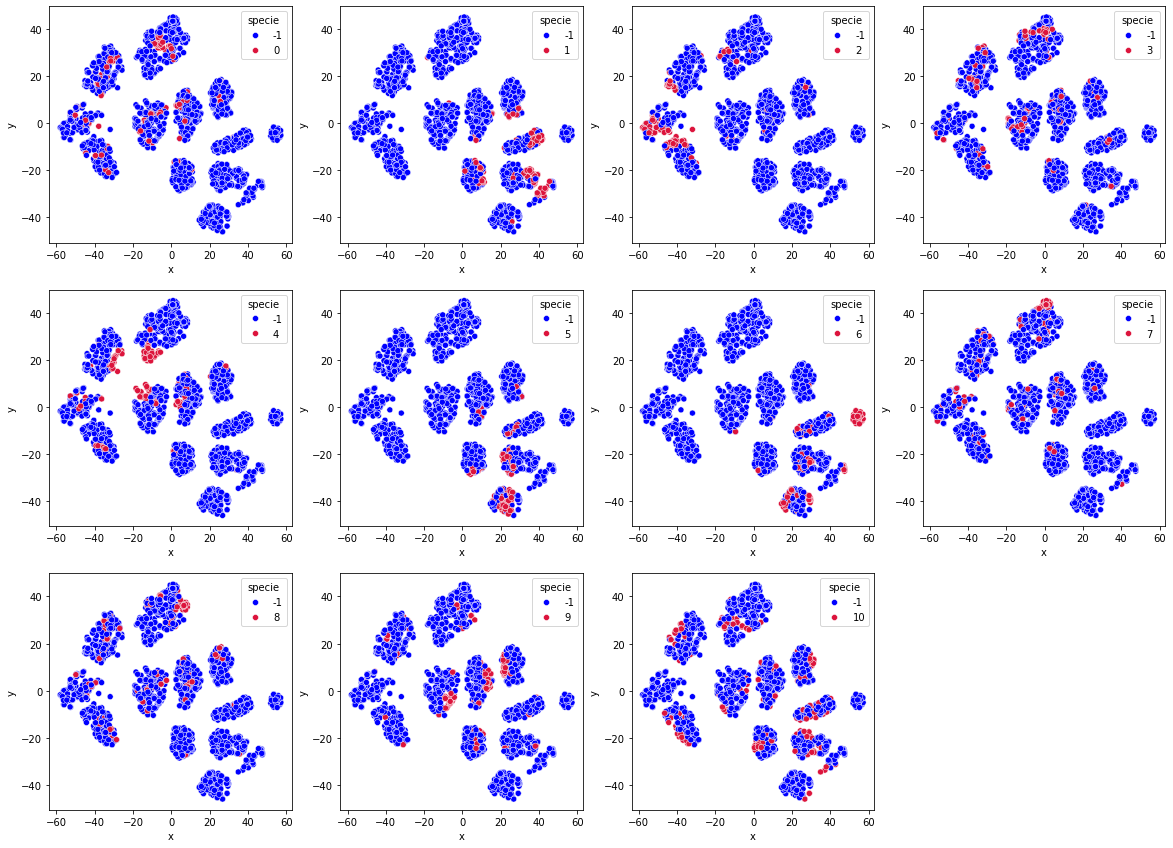

In [6]:
# Plotter le jeu d'entraînement
plot_data(X=x_train, y=y_train, palette=["blue", "crimson"], n_sample=DATA_SIZE)

# Recherche du meilleur classifieur

## Support Vector Machine

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       182
           1       0.98      0.99      0.99       182
           2       0.97      0.99      0.98       182
           3       0.89      0.94      0.91       181
           4       1.00      1.00      1.00       182
           5       0.87      0.96      0.91       182
           6       0.97      0.85      0.91       181
           7       0.94      0.88      0.91       182
           8       0.98      0.96      0.97       182
           9       0.99      0.98      0.98       182
          10       0.99      1.00      1.00       182

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



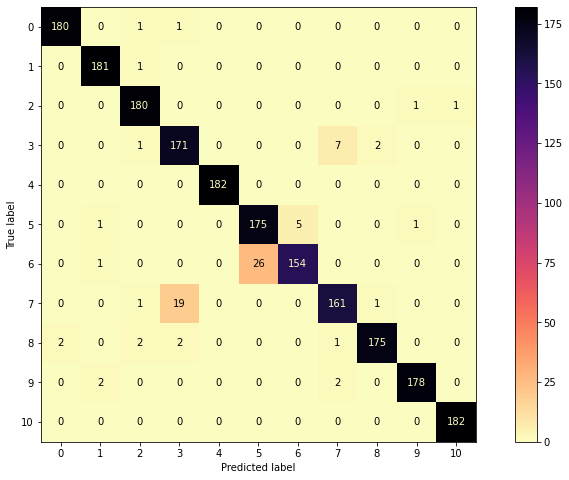

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.95      0.97     15117
          10       0.00      0.00      0.00         0

    accuracy                           0.95     15117
   macro avg       0.10      0.10      0.10     15117
weighted avg       1.00      0.95      0.97     15117



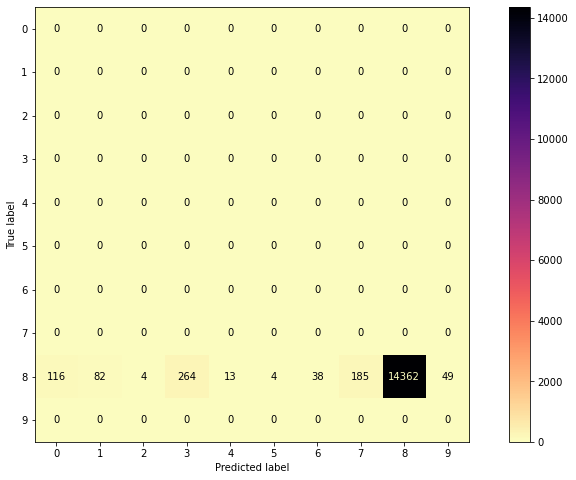

In [7]:
svc: SVC = test_classifier(classifier=SVC(random_state=RANDOM_STATE))

## Régression Logistique

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       182
           3       0.97      0.97      0.97       181
           4       1.00      1.00      1.00       182
           5       0.98      0.99      0.99       182
           6       0.99      0.98      0.99       181
           7       0.98      0.97      0.98       182
           8       0.98      0.98      0.98       182
           9       1.00      1.00      1.00       182
          10       1.00      1.00      1.00       182

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



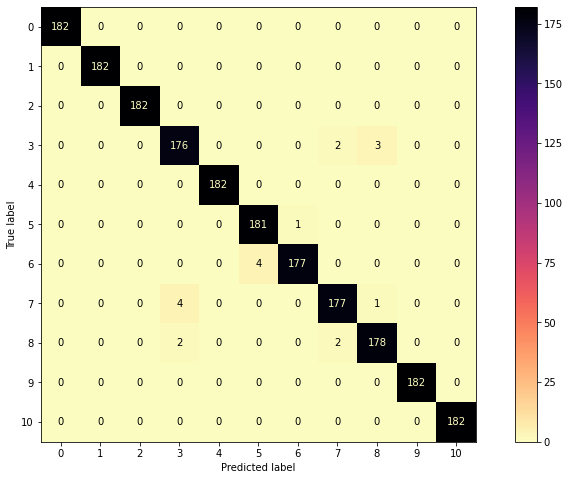

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.94      0.97     15117
          10       0.00      0.00      0.00         0

    accuracy                           0.94     15117
   macro avg       0.10      0.09      0.10     15117
weighted avg       1.00      0.94      0.97     15117



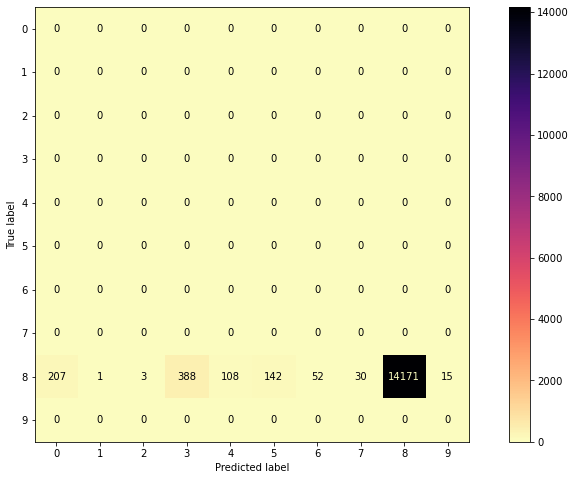

In [8]:
lgr: LogisticRegression = test_classifier(classifier=LogisticRegression(random_state=RANDOM_STATE, max_iter=10000, n_jobs=-1))

## Naive Bayes

              precision    recall  f1-score   support

           0       0.44      0.32      0.37       182
           1       0.65      0.73      0.69       182
           2       0.54      0.86      0.66       182
           3       0.36      0.28      0.31       181
           4       0.96      0.72      0.82       182
           5       0.63      0.88      0.74       182
           6       0.93      0.48      0.63       181
           7       0.46      0.42      0.44       182
           8       0.57      0.36      0.44       182
           9       0.40      0.63      0.49       182
          10       0.79      0.81      0.80       182

    accuracy                           0.59      2000
   macro avg       0.61      0.59      0.58      2000
weighted avg       0.61      0.59      0.58      2000



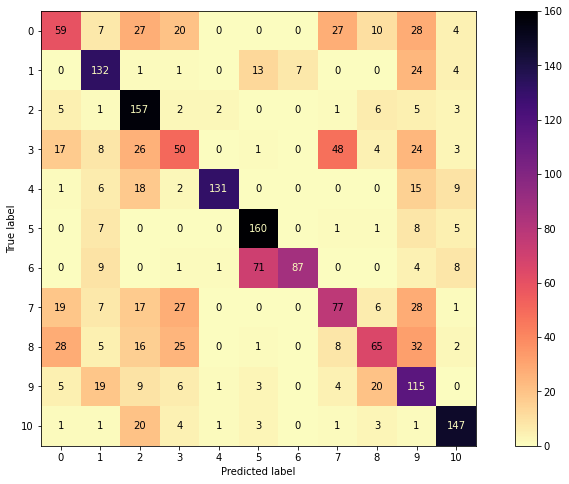

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.56      0.71     15117
          10       0.00      0.00      0.00         0

    accuracy                           0.56     15117
   macro avg       0.09      0.05      0.06     15117
weighted avg       1.00      0.56      0.71     15117



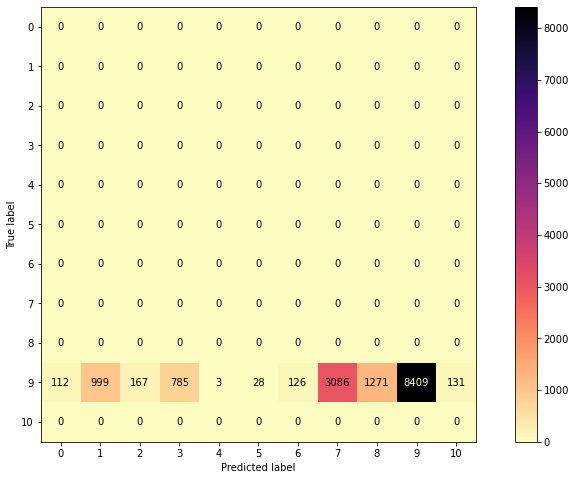

In [9]:
mlb: MultinomialNB = test_classifier(classifier=MultinomialNB())

## K-Nearest Neighbors

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       182
           1       0.80      0.93      0.86       182
           2       0.83      0.96      0.89       182
           3       0.66      0.76      0.70       181
           4       0.93      0.95      0.94       182
           5       0.69      0.91      0.79       182
           6       0.89      0.73      0.81       181
           7       0.71      0.67      0.69       182
           8       0.79      0.68      0.73       182
           9       0.86      0.81      0.84       182
          10       1.00      0.54      0.70       182

    accuracy                           0.80      2000
   macro avg       0.82      0.80      0.80      2000
weighted avg       0.82      0.80      0.80      2000



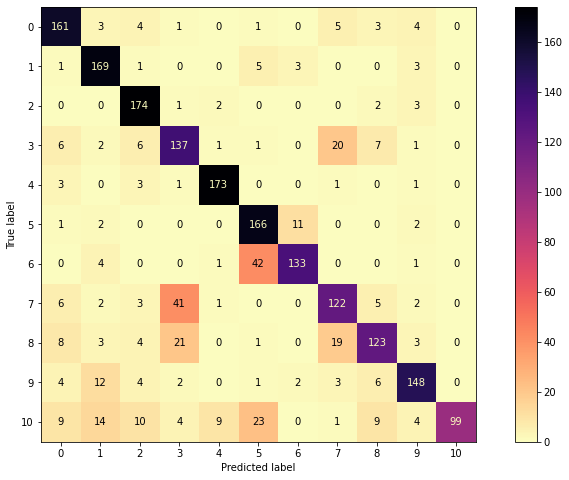

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.85      0.92     15117

    accuracy                           0.85     15117
   macro avg       0.10      0.09      0.09     15117
weighted avg       1.00      0.85      0.92     15117



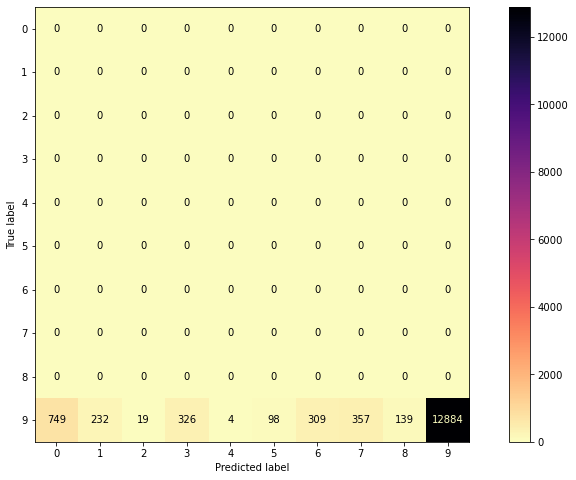

In [10]:
knn: KNeighborsClassifier = test_classifier(classifier=KNeighborsClassifier(n_neighbors=5, weights="uniform", n_jobs=-1))

## Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       182
           3       1.00      1.00      1.00       181
           4       1.00      1.00      1.00       182
           5       0.99      1.00      1.00       182
           6       1.00      0.99      1.00       181
           7       1.00      1.00      1.00       182
           8       1.00      1.00      1.00       182
           9       1.00      1.00      1.00       182
          10       1.00      1.00      1.00       182

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



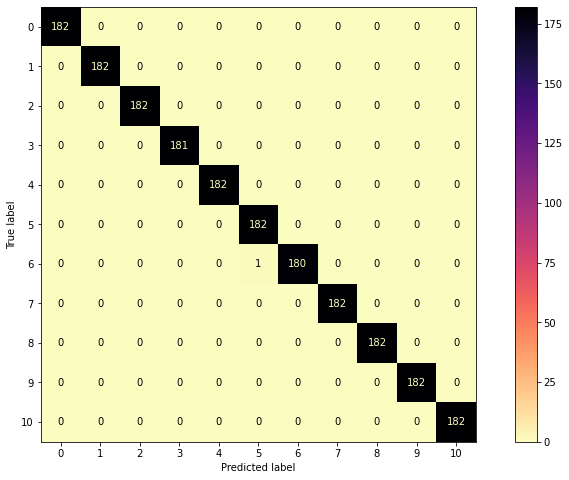

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.74      0.85     15117
          10       0.00      0.00      0.00         0

    accuracy                           0.74     15117
   macro avg       0.09      0.07      0.08     15117
weighted avg       1.00      0.74      0.85     15117



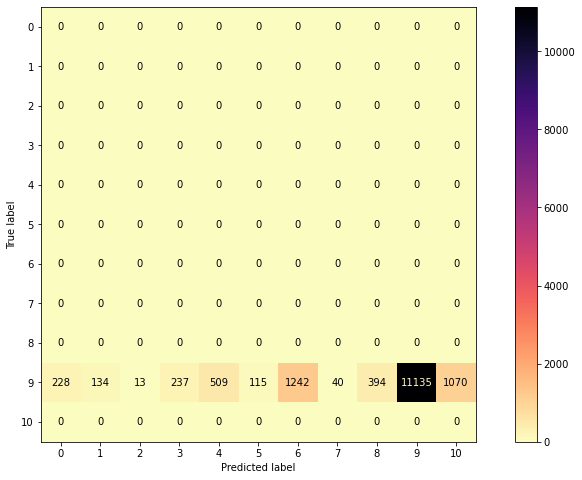

In [11]:
dtc: DecisionTreeClassifier = test_classifier(classifier=DecisionTreeClassifier(random_state=RANDOM_STATE))

## Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       182
           3       1.00      1.00      1.00       181
           4       1.00      1.00      1.00       182
           5       0.99      1.00      1.00       182
           6       1.00      0.99      1.00       181
           7       1.00      1.00      1.00       182
           8       1.00      1.00      1.00       182
           9       1.00      1.00      1.00       182
          10       1.00      1.00      1.00       182

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



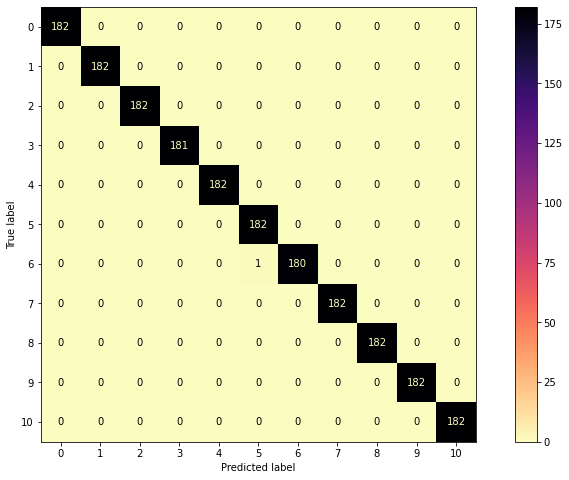

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.96      0.98     15117
          10       0.00      0.00      0.00         0

    accuracy                           0.96     15117
   macro avg       0.09      0.09      0.09     15117
weighted avg       1.00      0.96      0.98     15117



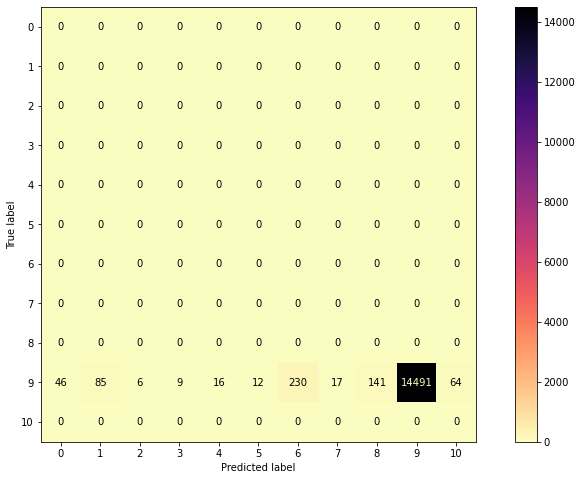

In [12]:
rfc: RandomForestClassifier = test_classifier(classifier=RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1))

## eXtreme Gradient Boosting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       182
           3       1.00      1.00      1.00       181
           4       1.00      1.00      1.00       182
           5       0.99      1.00      1.00       182
           6       1.00      0.99      1.00       181
           7       1.00      1.00      1.00       182
           8       1.00      1.00      1.00       182
           9       1.00      1.00      1.00       182
          10       1.00      1.00      1.00       182

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



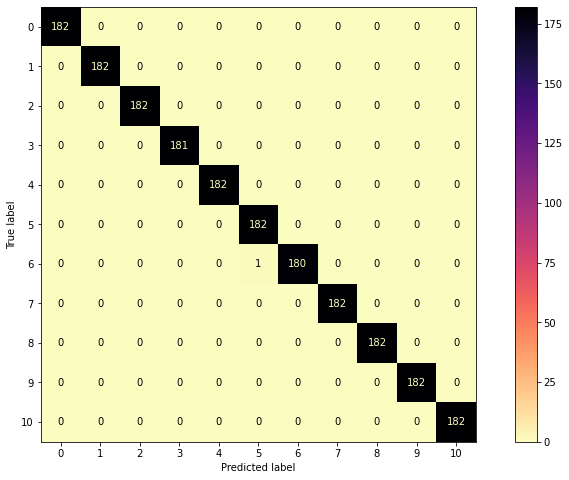

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.98      0.99     15117
          10       0.00      0.00      0.00         0

    accuracy                           0.98     15117
   macro avg       0.09      0.09      0.09     15117
weighted avg       1.00      0.98      0.99     15117



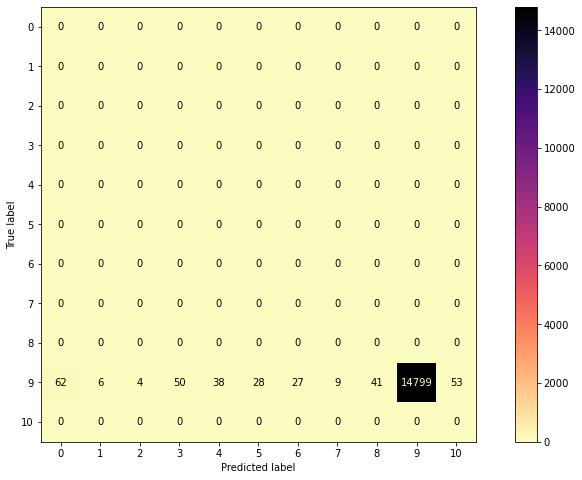

In [14]:
xgb: xgb_.XGBClassifier = test_classifier(classifier=xgb_.XGBClassifier(random_state=RANDOM_STATE))